# Diabetic Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
from sklearn.preprocessing import Normalizer, StandardScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

## EDA

In [3]:
df = pd.read_csv(f"C:\\data science\\Meri skill\\Project 2 MeriSKILL\\diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Univariate Analysis

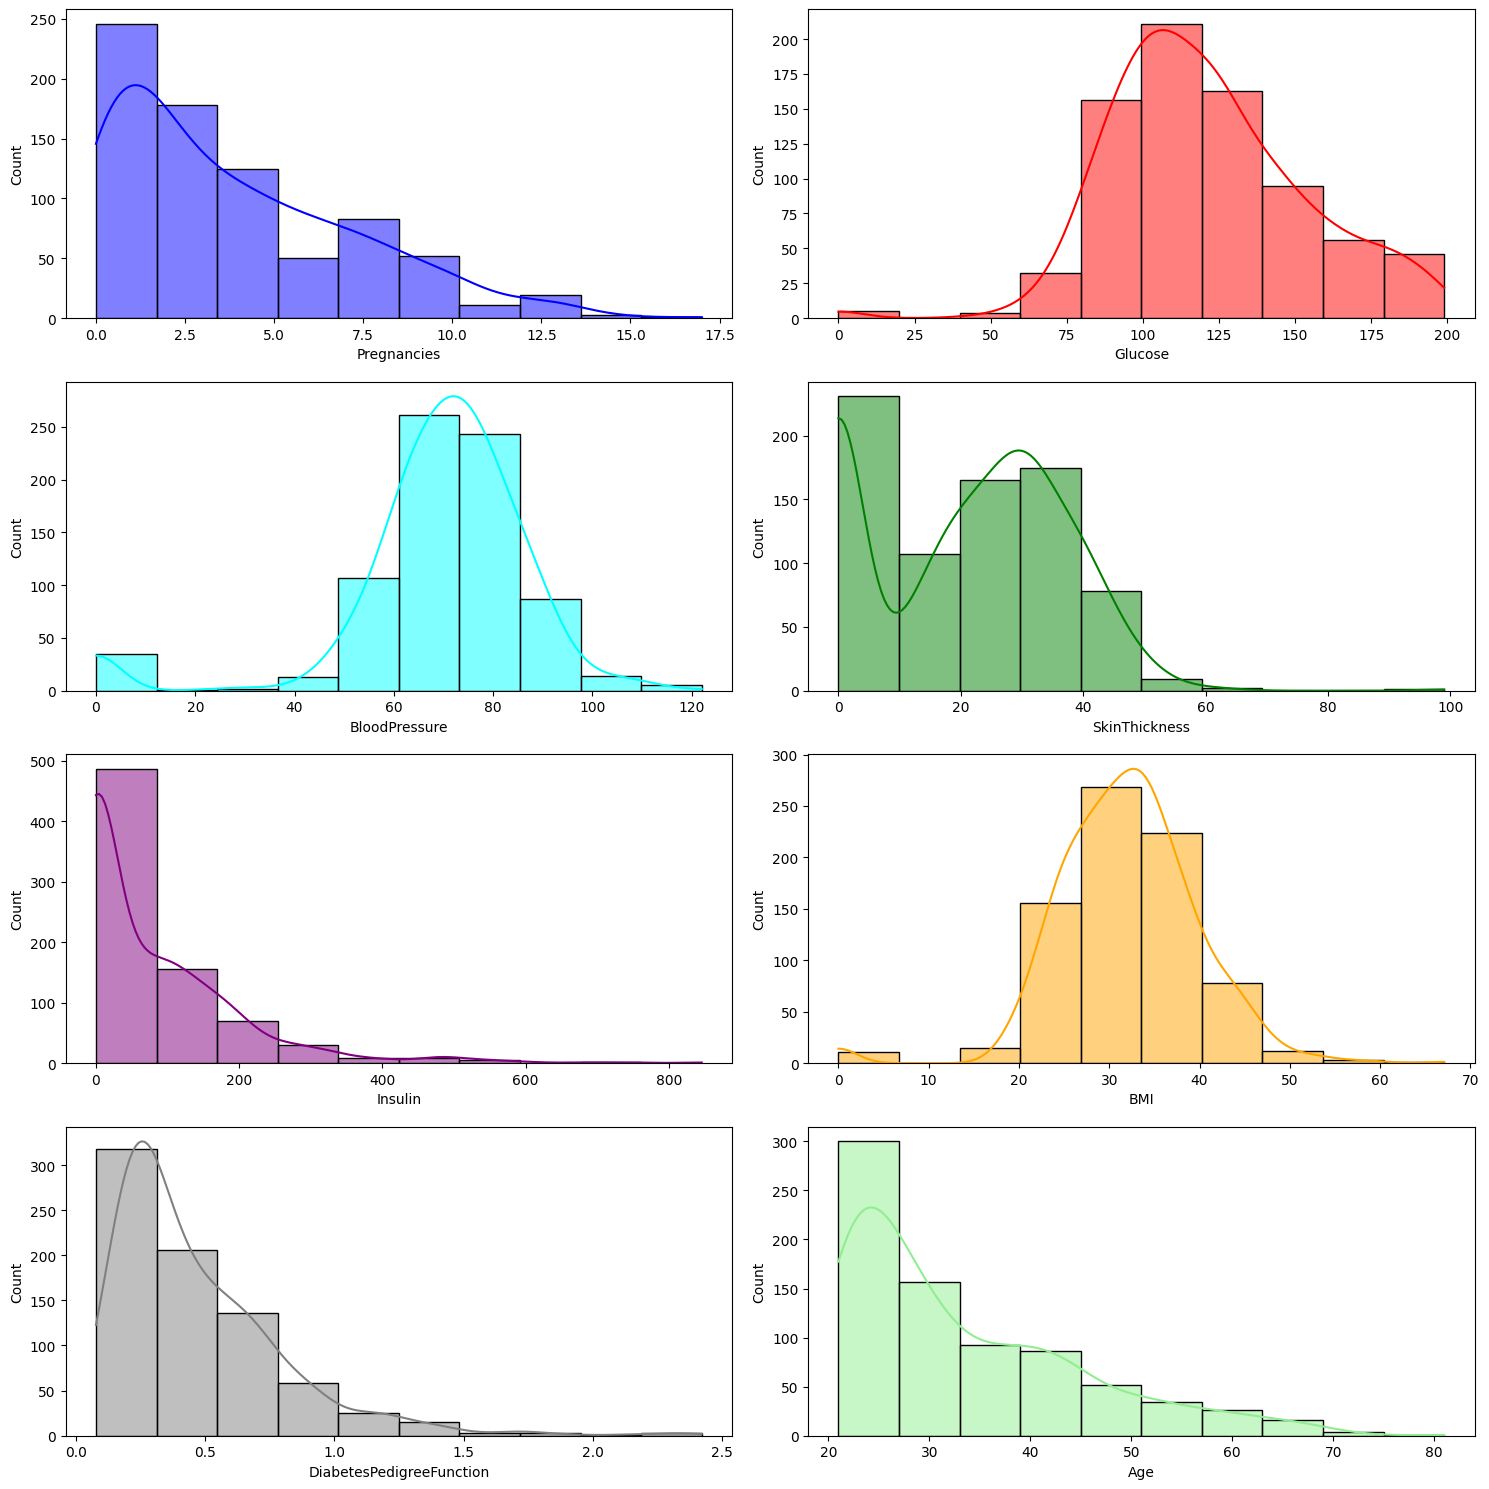

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.histplot(data=df,x='Pregnancies',bins=10,color='Blue',kde=True)

plt.subplot(4,2,2)
sns.histplot(data=df,x='Glucose',bins=10,color='Red',kde=True)

plt.subplot(4,2,3)
sns.histplot(data=df,x='BloodPressure',bins=10,color='Cyan',kde=True)

plt.subplot(4,2,4)
sns.histplot(data=df,x='SkinThickness',bins=10,color='Green',kde=True)

plt.subplot(4,2,5)
sns.histplot(data=df,x='Insulin',bins=10,color='Purple',kde=True)

plt.subplot(4,2,6)
sns.histplot(data=df,x='BMI',bins=10,color='Orange',kde=True)

plt.subplot(4,2,7)
sns.histplot(data=df,x='DiabetesPedigreeFunction',bins=10,color='Grey',kde=True)

plt.subplot(4,2,8)
sns.histplot(data=df,x='Age',bins=10,color='lightgreen',kde=True)

plt.tight_layout()
plt.show()

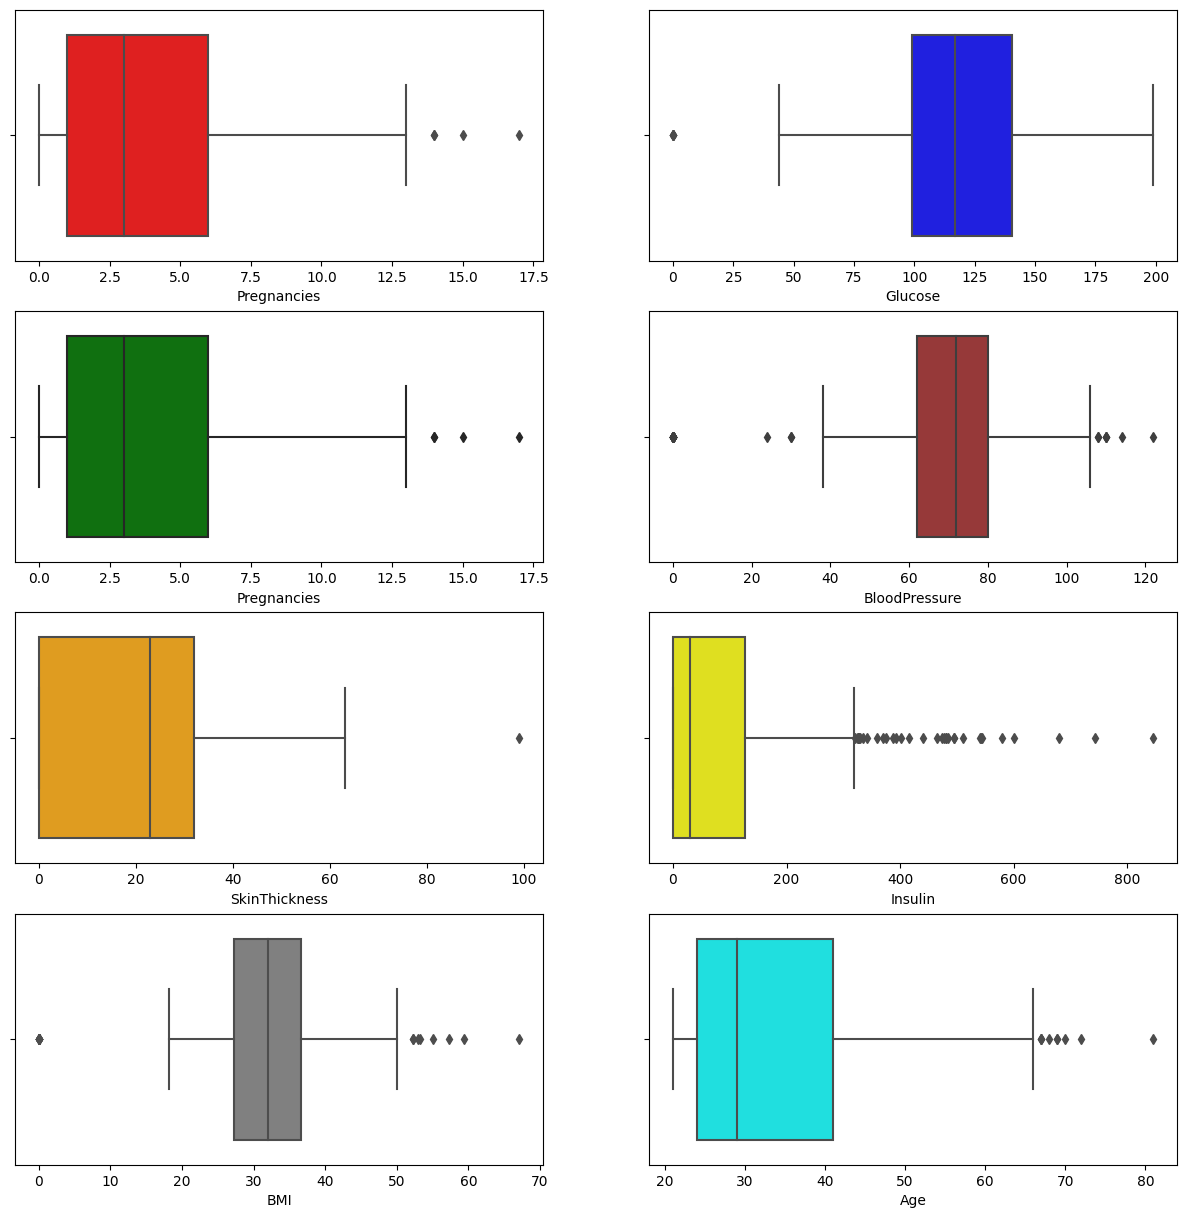

In [7]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.boxplot(data=df, x='Pregnancies',color='red')

plt.subplot(4,2,2)
sns.boxplot(data=df, x='Glucose',color='blue')

plt.subplot(4,2,3)
sns.boxplot(data=df, x='Pregnancies',color='green')

plt.subplot(4,2,4)
sns.boxplot(data=df, x='BloodPressure',color='brown')

plt.subplot(4,2,5)
sns.boxplot(data=df, x='SkinThickness',color='orange')

plt.subplot(4,2,6)
sns.boxplot(data=df, x='Insulin',color='yellow')

plt.subplot(4,2,7)
sns.boxplot(data=df, x='BMI',color='grey')

plt.subplot(4,2,8)
sns.boxplot(data=df, x='Age',color='cyan')

plt.show()


### Bivariate Analysis

<Figure size 1500x1500 with 0 Axes>

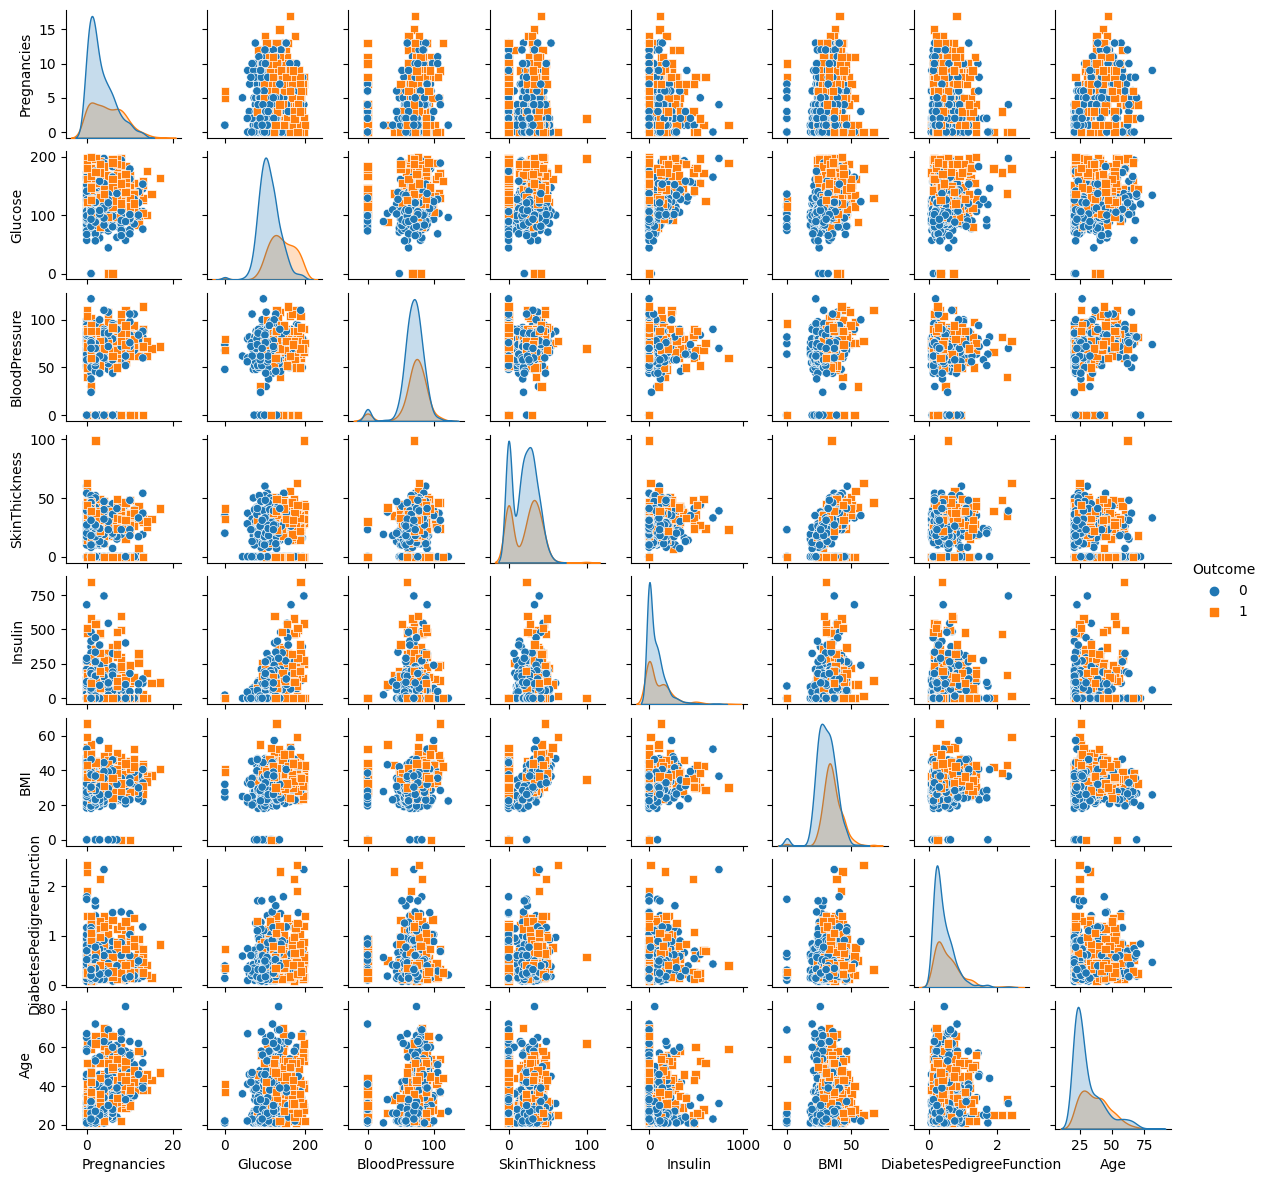

In [8]:
plt.figure(figsize=(15,15))

sns.pairplot(data=df,hue='Outcome', palette='tab10',height=1.5,markers=['o','s'])

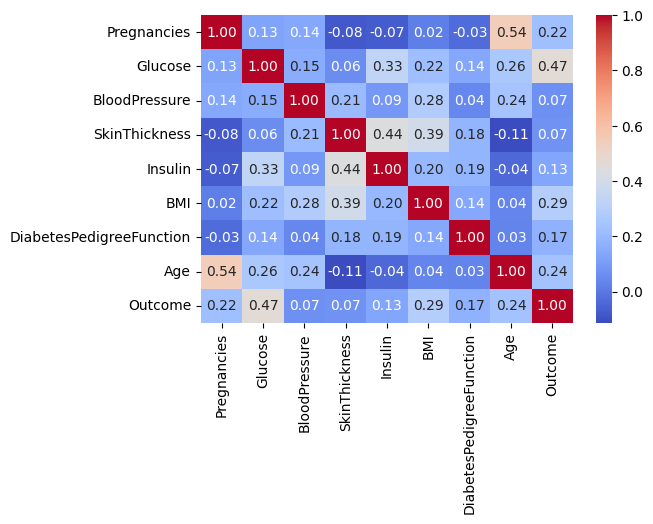

In [9]:
corr_matrix=df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()



## Pre Processing

In [10]:
X = df.drop(['Outcome'],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
#pca = PCA(n_components=7)
#X_reduced = pca.fit_transform(X)

In [12]:
Y = df['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
kbin_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
X_discretized = kbin_discretizer.fit_transform(X)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, Y_train, Y_test= train_test_split(X_discretized,Y,test_size=0.2,random_state=0)

In [16]:
pipeline = Pipeline([
    ('std_scalar',StandardScaler())
])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.fit_transform(X_test)

## Models Training And Testing

In [17]:
## Function for predicting the accuracy of a model
def cal_Accuracy(Y_test,Y_pred):
    print("Confusion MAtrix : \n", confusion_matrix(Y_test,Y_pred))
    
    print("Accuracy : ", accuracy_score(Y_test,Y_pred)*100)
    
    print("Classification Report : \n",
          classification_report(Y_test,Y_pred))
    

## Desiscion Tree

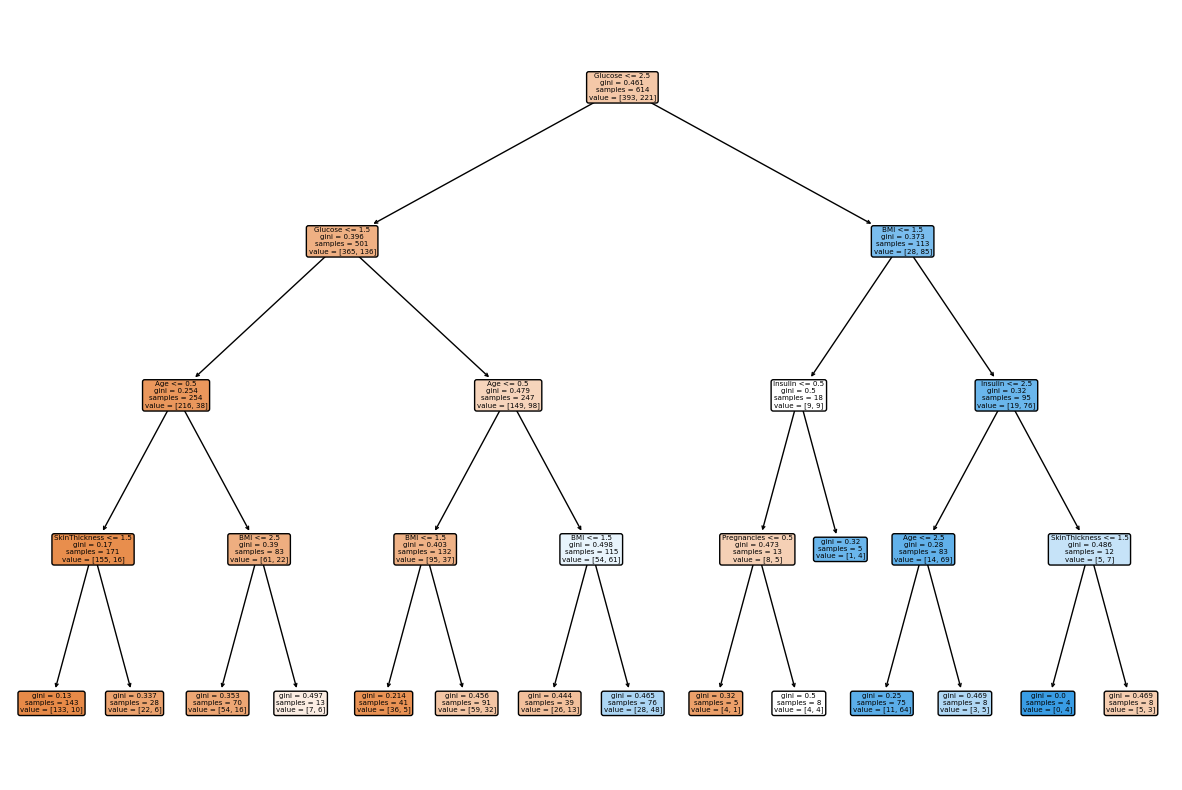

In [18]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=4,min_samples_split=10)
clf_ent = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=4,min_samples_split=10)
clf_gini.fit(X_train,Y_train)
clf_ent.fit(X_train,Y_train)
#regressor = tree.DecisionTreeRegressor(max_depth=4,min_samples_leaf=4,random_state=42)
#regressor.fit(X_train,Y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf_gini, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()


In [19]:
Y_pred_gini = clf_gini.predict(X_test)
print("Predicted Values on ", Y_pred_gini)
#y_pred_entropy = prediction(X_test,clf_entropy)
df_pred=pd.DataFrame()
df_pred['Y_test']=Y_test
df_pred['Y_pred']=Y_pred_gini
df_pred.head(n=10)

Predicted Values on  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


,Y_test,Y_pred
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
103,0,0
338,1,1
588,1,1
395,0,0
204,0,0


In [20]:
cal_Accuracy(Y_test,Y_pred_gini)


Confusion MAtrix : 
 [[97 10]
 [23 24]]
Accuracy :  78.57142857142857
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       107
           1       0.71      0.51      0.59        47

    accuracy                           0.79       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.78      0.79      0.77       154



## Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=10,max_leaf_nodes=4,min_samples_split=10,bootstrap=False)
rf.fit(scaled_X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_leaf_nodes=4,
                       min_samples_split=10)

In [40]:
y_pred_rf = rf.predict(scaled_X_test)
print(y_pred_rf)

[1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]


In [41]:
cal_Accuracy(Y_test,y_pred_rf)

Confusion MAtrix : 
 [[101   6]
 [ 29  18]]
Accuracy :  77.27272727272727
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       107
           1       0.75      0.38      0.51        47

    accuracy                           0.77       154
   macro avg       0.76      0.66      0.68       154
weighted avg       0.77      0.77      0.75       154



## Support Vector Machine

In [42]:
svc =SVC()
svc.fit(scaled_X_train,Y_train)

SVC()

In [43]:
svc_pred = svc.predict(scaled_X_test)

In [44]:
cal_Accuracy(Y_test,svc_pred)

Confusion MAtrix : 
 [[97 10]
 [18 29]]
Accuracy :  81.81818181818183
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



## Logistic Regression

In [45]:
reg = LogisticRegression()
reg.fit(scaled_X_train,Y_train)

LogisticRegression()

In [46]:
reg_pred = reg.predict(scaled_X_test)

In [47]:
cal_Accuracy(Y_test,reg_pred)

Confusion MAtrix : 
 [[96 11]
 [16 31]]
Accuracy :  82.46753246753246
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.66      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



## Gradeint Boosting Classifier

In [48]:
gr = GradientBoostingClassifier()
gr.fit(scaled_X_train,Y_train)

GradientBoostingClassifier()

In [49]:
gr_pred = gr.predict(scaled_X_test)
cal_Accuracy(Y_test,gr_pred)

Confusion MAtrix : 
 [[98  9]
 [19 28]]
Accuracy :  81.81818181818183
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



## Models Performance

#### 1) Decison Tree 78.57%
#### 2) Random Forest 77.27%
#### 3) Support Vector Machine 81.81%
#### 4) Logistic Regression 82.46%
#### 5) Gradient Boosting Classifier 81.81%

####  saving the  logistic regression model in pk1 format which will be load in a django


In [50]:
import joblib


In [51]:
joblib.dump(reg,'reg.pk1')

['reg.pk1']